In [57]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For visualization
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [58]:
# Load Data
df = pd.read_csv("news.csv")
print(df.head())  # Display first few rows of the dataframe
print(df.shape)  # Display the shape of the dataframe
print(df.isnull().sum())  # Check for missing values

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
(6335, 4)
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [59]:

# Prepare Data
labels = df.label
x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size=0.2, random_state=20)

In [60]:
# Initialize TfidfVectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [61]:
# Initialize and Train the Model
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [62]:
# Predict the test dataset
y_pred = pac.predict(tf_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(score * 100, 2)}%")

Accuracy: 94.87%


In [63]:
# Create a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
target_names = ['fake', 'real']  # Define class labels

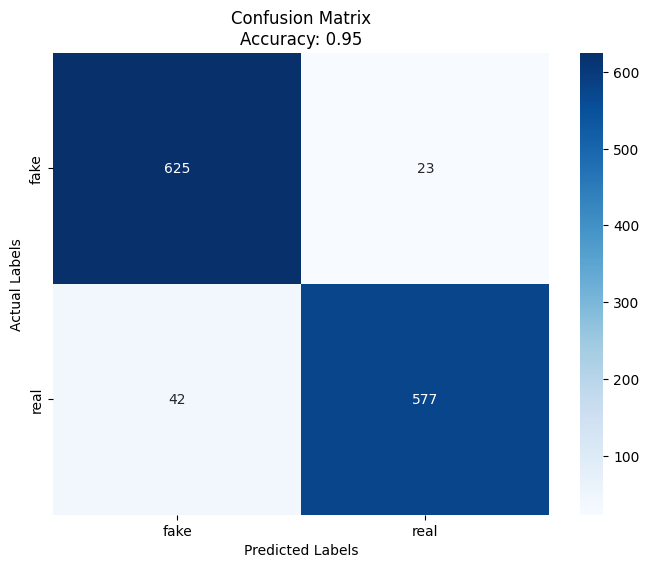

In [64]:
# Create a graphical representation (confusion matrix heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_score(y_test, y_pred):.2f}')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [66]:


# Save Model and Vectorizer
with open('fnds_model.pkl', 'wb') as model_file:
    pickle.dump(pac, model_file)

with open('vectorizer.pkl', 'wb') as vector_file:
    pickle.dump(vector, vector_file)
